In [1]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Load Dataset

In [2]:
df = pd.read_csv('../data/NumericalLoanData.csv', low_memory=False)

# Split Dataset

In [3]:
train, test = train_test_split(df, test_size=0.2)

In [4]:
train_y = train.pop('Default')
test_y = test.pop('Default')

# Quadratic Discriminant Analysis

In [5]:
qda = QuadraticDiscriminantAnalysis()

In [6]:
qda.fit(train, train_y)

QuadraticDiscriminantAnalysis()

In [7]:
test_y_predicted = qda.predict(test)

In [8]:
print("Accuracy:", accuracy_score(test_y, test_y_predicted))
print("Classification Report:\n", classification_report(test_y, test_y_predicted))
print("ROC AUC Score:", roc_auc_score(test_y, qda.predict_proba(test)[:, 1]))

Accuracy: 0.6675780687868758
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64      3013
           1       0.73      0.65      0.69      3936

    accuracy                           0.67      6949
   macro avg       0.67      0.67      0.67      6949
weighted avg       0.68      0.67      0.67      6949

ROC AUC Score: 0.7232527610705911


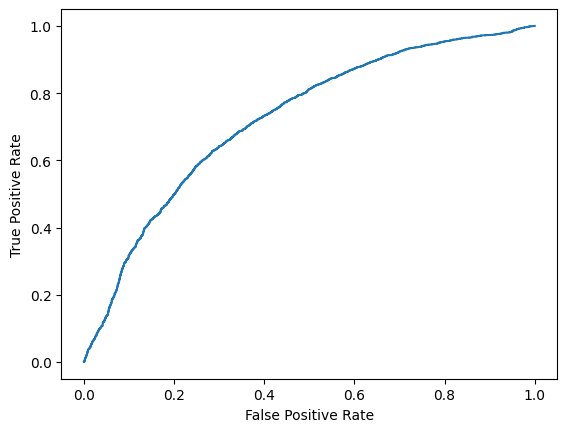

In [9]:
test_y_proba = qda.predict_proba(test)[::,1]
fpr, tpr, _ = roc_curve(test_y,  test_y_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cross-validation Accuracy

In [15]:
qda = QuadraticDiscriminantAnalysis()
X = copy.deepcopy(df)
y = X.pop('Default')
score = cross_val_score(qda, X, y, cv=10)
roc_auc = cross_val_score(qda, X, y, scoring='roc_auc', cv=10)

print(f'Accuracy: {score.mean()} +- {score.std()}')
print(f'ROC AUC: {roc_auc.mean()} +- {roc_auc.std()}')

Accuracy: 0.6592277597611031 +- 0.06400040471822092
ROC AUC: 0.717509613904809 +- 0.06967921259929372
